In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN

In [2]:
time_series=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
print(time_series)
train_size=int(len(time_series)*0.6)
train,test=time_series[0:train_size],time_series[train_size:]
print(train)
print(test)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15]


In [3]:
def create_dataset(dataset, seq_length):
    data_X,data_Y=[],[]
    for i in range(len(dataset)-seq_length):
      data_X.append(dataset[i:(i+seq_length)])
      data_Y.append(dataset[i+seq_length])
    return np.array(data_X),np.array(data_Y)

seq_length=4
train_X,train_Y=create_dataset(train,seq_length)
test_X,test_Y=create_dataset(test,seq_length)
print(train_X)
print(train_Y)
#

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
[5 6 7 8 9]


In [4]:
model=Sequential()
model.add(SimpleRNN(16, activation='relu',input_shape=(seq_length,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
5/5 - 2s - 457ms/step - loss: 34.9838
Epoch 2/200
5/5 - 0s - 10ms/step - loss: 29.8877
Epoch 3/200
5/5 - 0s - 10ms/step - loss: 24.7701
Epoch 4/200
5/5 - 0s - 13ms/step - loss: 20.3753
Epoch 5/200
5/5 - 0s - 12ms/step - loss: 16.8657
Epoch 6/200
5/5 - 0s - 11ms/step - loss: 13.6682
Epoch 7/200
5/5 - 0s - 11ms/step - loss: 10.7119
Epoch 8/200
5/5 - 0s - 13ms/step - loss: 8.3997
Epoch 9/200
5/5 - 0s - 12ms/step - loss: 6.8430
Epoch 10/200
5/5 - 0s - 9ms/step - loss: 5.1459
Epoch 11/200
5/5 - 0s - 12ms/step - loss: 3.7360
Epoch 12/200
5/5 - 0s - 13ms/step - loss: 2.6781
Epoch 13/200
5/5 - 0s - 12ms/step - loss: 1.8145
Epoch 14/200
5/5 - 0s - 27ms/step - loss: 1.1472
Epoch 15/200
5/5 - 0s - 10ms/step - loss: 0.6842
Epoch 16/200
5/5 - 0s - 14ms/step - loss: 0.4010
Epoch 17/200
5/5 - 0s - 10ms/step - loss: 0.2501
Epoch 18/200
5/5 - 0s - 11ms/step - loss: 0.1742
Epoch 19/200
5/5 - 0s - 29ms/step - loss: 0.1624
Epoch 20/200
5/5 - 0s - 11ms/step - loss: 0.1509
Epoch 21/200
5/5 - 0s 

<Axes: >

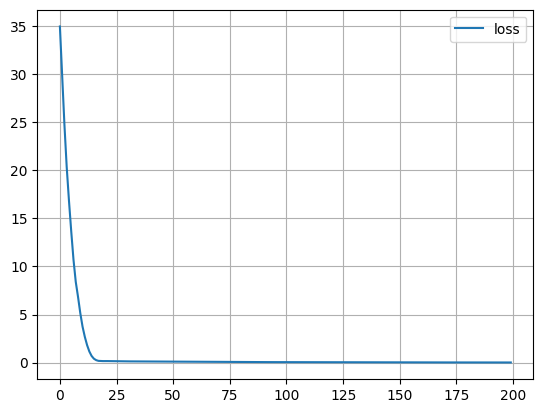

In [5]:
history=model.fit(train_X,train_Y,epochs=200,batch_size=1,verbose=2)
pd.DataFrame(history.history).plot(grid=True)
#

In [6]:
Evaluacion=model.evaluate(test_X,test_Y)
print(Evaluacion)
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - loss: 1.0678
1.0677554607391357


In [7]:
print(test_X)
print(test_Y)
y_pred=model.predict(test_X)
print(y_pred)
#

[[10 11 12 13]
 [11 12 13 14]]
[14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
[[14.941636]
 [16.117512]]
